## Structured Latent Spaces MNIST

In [1]:
import torch
import argparse
import MNIST_123 
device = "cuda" if torch.cuda.is_available() else "cpu"
args = argparse.Namespace(
    data_path="../data",
    batch_size=64,
    latent_dim=128,
    device=device
)

# Architecture Reasoning

---

## 1. Overview of Our Solution

We built a SimCLR-inspired contrastive learning pipeline for MNIST. The model includes a convolutional encoder with BatchNorm, trained using **NT-Xent contrastive loss** on **augmented digit pairs**. After unsupervised training, a classifier is trained on frozen projections.

Our goal is to learn **invariant and discriminative representations** from unlabeled data using strong augmentations and contrastive learning.

---

## 2. Encoder Architecture

### Layer Breakdown:
- **Conv1 (1 → 32)**  
  - BatchNorm + ReLU, output size: 14×14
- **Conv2 (32 → 64)**  
  - BatchNorm + ReLU, output size: 7×7
- **Conv3 (64 → 128)**  
  - BatchNorm + ReLU, output size: 4×4 → 1×1 via AdaptiveAvgPool2d

### Projection Head:
- `128 → 256 → 128`, with BatchNorm and ReLU

### Why It Works:
- Deeper encoder captures richer features
- BatchNorm stabilizes contrastive training
- Projection head ensures separation of contrastive and downstream tasks

---

## 3. Contrastive Training

We use **NT-Xent loss** with temperature τ = 0.1:
- Each pair: two augmentations of the same image (positive)
- Negatives: all other examples in batch
- Representations normalized before similarity comparison

### Why It Works:
- Learns without labels
- Encourages invariance to transformations
- Produces generalizable embeddings for classification

---

## 4. Classifier Design

After training, we freeze the encoder and use:
- MLP: `128 → 64 → 10`
- Dropout: 0.2
- Trained with CrossEntropy on frozen features

### Why It Works:
- MLP is lightweight yet effective for MNIST
- Evaluates the quality of learned representations
- Freezing encoder ensures fair representation evaluation

---

## 5. Data Augmentation

### Transformations Used:
- Random resized crop
- Rotation (±15°)
- Affine shift (10%)
- Color jitter (optional, 50% chance)
- Normalization with MNIST stats

### Why It Works:
- Encourages learning shape-based features
- Reduces overfitting on a small dataset
- Simulates real-world variation

---

## 6. Training and Evaluation

| Component      | Value/Method              | Justification                         |
|----------------|---------------------------|----------------------------------------|
| Optimizer      | Adam + weight decay       | Adaptive + regularization              |
| Scheduler      | CosineAnnealingLR         | Smooth convergence                     |
| Loss           | NT-Xent + CrossEntropy    | Self-supervised + supervised stage     |
| Gradient Clip  | Max norm = 1              | Prevents exploding gradients           |
| BatchNorm      | In encoder & projector    | Stabilizes contrastive loss            |

---

## 7. Evaluation Protocol

- 90/10 train/val split
- Classifier trained on frozen encoder
- Accuracy/loss reported on all sets
- Latent and image space visualized with t-SNE

---

## 8. Summary

This contrastive pipeline effectively learns digit representations from MNIST using strong augmentation and projection. The model shows how **self-supervised learning** can match supervised baselines even with a small encoder and minimal labels.


In [2]:
train_loader, val_loader, test_loader = MNIST_123.load_data(args)
autoencoder = MNIST_123.Autoencoder(latent_dim=args.latent_dim).to(args.device)

## Training Autoencoder

Epoch 1/30 | Train Loss: 0.9982 | Val Loss: 0.6353 | Test Loss: 0.5448


Epoch 2/30 | Train Loss: 0.4557 | Val Loss: 0.4416 | Test Loss: 0.4094


Epoch 3/30 | Train Loss: 0.3583 | Val Loss: 0.3386 | Test Loss: 0.3462


Epoch 4/30 | Train Loss: 0.3021 | Val Loss: 0.3216 | Test Loss: 0.3423


Epoch 5/30 | Train Loss: 0.2681 | Val Loss: 0.2790 | Test Loss: 0.2944


Epoch 6/30 | Train Loss: 0.2432 | Val Loss: 0.2693 | Test Loss: 0.2973


Epoch 7/30 | Train Loss: 0.2240 | Val Loss: 0.2437 | Test Loss: 0.2736


Epoch 8/30 | Train Loss: 0.2106 | Val Loss: 0.2361 | Test Loss: 0.2556


Epoch 9/30 | Train Loss: 0.2004 | Val Loss: 0.2207 | Test Loss: 0.2490


Epoch 10/30 | Train Loss: 0.1886 | Val Loss: 0.2092 | Test Loss: 0.2431


Epoch 11/30 | Train Loss: 0.1787 | Val Loss: 0.2072 | Test Loss: 0.2359


Epoch 12/30 | Train Loss: 0.1728 | Val Loss: 0.1891 | Test Loss: 0.2252


Epoch 13/30 | Train Loss: 0.1685 | Val Loss: 0.1914 | Test Loss: 0.2271


Epoch 14/30 | Train Loss: 0.1589 | Val Loss: 0.1753 | Test Loss: 0.2179


Epoch 15/30 | Train Loss: 0.1548 | Val Loss: 0.1746 | Test Loss: 0.2160


Epoch 16/30 | Train Loss: 0.1502 | Val Loss: 0.1702 | Test Loss: 0.2088


Epoch 17/30 | Train Loss: 0.1442 | Val Loss: 0.1624 | Test Loss: 0.2010


Epoch 18/30 | Train Loss: 0.1391 | Val Loss: 0.1572 | Test Loss: 0.2019


Epoch 19/30 | Train Loss: 0.1347 | Val Loss: 0.1477 | Test Loss: 0.1963


Epoch 20/30 | Train Loss: 0.1299 | Val Loss: 0.1408 | Test Loss: 0.1916


Epoch 21/30 | Train Loss: 0.1261 | Val Loss: 0.1392 | Test Loss: 0.1922


Epoch 22/30 | Train Loss: 0.1202 | Val Loss: 0.1349 | Test Loss: 0.1940


Epoch 23/30 | Train Loss: 0.1198 | Val Loss: 0.1338 | Test Loss: 0.1827


Epoch 24/30 | Train Loss: 0.1170 | Val Loss: 0.1302 | Test Loss: 0.1852


Epoch 25/30 | Train Loss: 0.1144 | Val Loss: 0.1266 | Test Loss: 0.1828


Epoch 26/30 | Train Loss: 0.1111 | Val Loss: 0.1227 | Test Loss: 0.1809


Epoch 27/30 | Train Loss: 0.1120 | Val Loss: 0.1255 | Test Loss: 0.1798


Epoch 28/30 | Train Loss: 0.1094 | Val Loss: 0.1228 | Test Loss: 0.1765


Epoch 29/30 | Train Loss: 0.1087 | Val Loss: 0.1236 | Test Loss: 0.1764


Epoch 30/30 | Train Loss: 0.1071 | Val Loss: 0.1214 | Test Loss: 0.1782


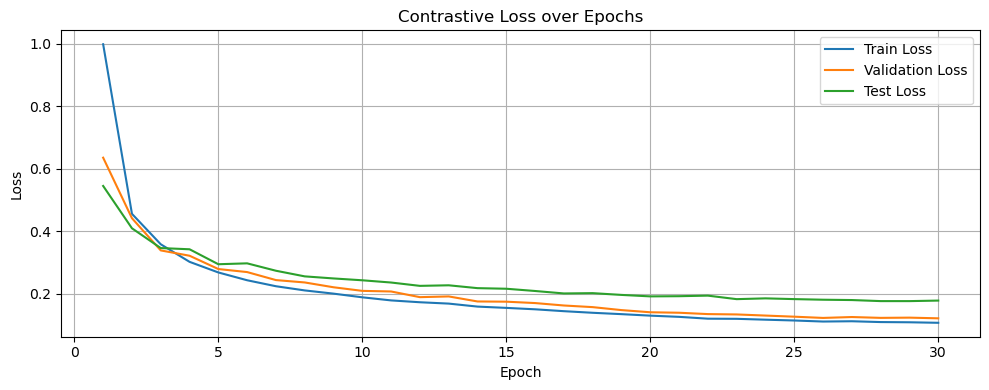

In [3]:
MNIST_123.train_autoencoder(autoencoder, train_loader, val_loader, test_loader,args,epochs=30)

## Training Classifier

Epoch 1/30 | Train Loss: 0.9289, Acc: 80.20% | Val Acc: 92.62% | Test Acc: 94.03%


Epoch 2/30 | Train Loss: 0.2872, Acc: 92.80% | Val Acc: 94.72% | Test Acc: 95.62%


Epoch 3/30 | Train Loss: 0.2140, Acc: 94.28% | Val Acc: 95.28% | Test Acc: 96.25%


Epoch 4/30 | Train Loss: 0.1859, Acc: 94.87% | Val Acc: 95.83% | Test Acc: 96.60%


Epoch 5/30 | Train Loss: 0.1689, Acc: 95.13% | Val Acc: 96.12% | Test Acc: 96.79%


Epoch 6/30 | Train Loss: 0.1610, Acc: 95.27% | Val Acc: 95.72% | Test Acc: 96.81%


Epoch 7/30 | Train Loss: 0.1514, Acc: 95.53% | Val Acc: 95.92% | Test Acc: 96.94%


Epoch 8/30 | Train Loss: 0.1450, Acc: 95.70% | Val Acc: 96.02% | Test Acc: 97.14%


Epoch 9/30 | Train Loss: 0.1371, Acc: 96.00% | Val Acc: 96.17% | Test Acc: 97.25%


Epoch 10/30 | Train Loss: 0.1337, Acc: 96.02% | Val Acc: 96.47% | Test Acc: 97.11%


Epoch 11/30 | Train Loss: 0.1325, Acc: 95.96% | Val Acc: 96.33% | Test Acc: 97.25%


Epoch 12/30 | Train Loss: 0.1284, Acc: 96.09% | Val Acc: 96.30% | Test Acc: 97.30%


Epoch 13/30 | Train Loss: 0.1258, Acc: 96.13% | Val Acc: 96.32% | Test Acc: 97.30%


Epoch 14/30 | Train Loss: 0.1246, Acc: 96.14% | Val Acc: 96.47% | Test Acc: 97.41%


Epoch 15/30 | Train Loss: 0.1216, Acc: 96.30% | Val Acc: 96.37% | Test Acc: 97.39%


Epoch 16/30 | Train Loss: 0.1205, Acc: 96.39% | Val Acc: 96.38% | Test Acc: 97.33%


Epoch 17/30 | Train Loss: 0.1200, Acc: 96.29% | Val Acc: 96.48% | Test Acc: 97.39%


Epoch 18/30 | Train Loss: 0.1199, Acc: 96.40% | Val Acc: 96.45% | Test Acc: 97.38%


Epoch 19/30 | Train Loss: 0.1170, Acc: 96.36% | Val Acc: 96.38% | Test Acc: 97.41%


Epoch 20/30 | Train Loss: 0.1137, Acc: 96.46% | Val Acc: 96.38% | Test Acc: 97.46%


Epoch 21/30 | Train Loss: 0.1147, Acc: 96.54% | Val Acc: 96.57% | Test Acc: 97.50%


Epoch 22/30 | Train Loss: 0.1139, Acc: 96.52% | Val Acc: 96.48% | Test Acc: 97.43%


Epoch 23/30 | Train Loss: 0.1113, Acc: 96.57% | Val Acc: 96.18% | Test Acc: 97.45%


Epoch 24/30 | Train Loss: 0.1117, Acc: 96.53% | Val Acc: 96.77% | Test Acc: 97.33%


Epoch 25/30 | Train Loss: 0.1078, Acc: 96.67% | Val Acc: 96.75% | Test Acc: 97.49%


Epoch 26/30 | Train Loss: 0.1104, Acc: 96.55% | Val Acc: 96.72% | Test Acc: 97.50%


Epoch 27/30 | Train Loss: 0.1096, Acc: 96.55% | Val Acc: 96.52% | Test Acc: 97.44%


Epoch 28/30 | Train Loss: 0.1085, Acc: 96.62% | Val Acc: 96.48% | Test Acc: 97.55%


Epoch 29/30 | Train Loss: 0.1051, Acc: 96.75% | Val Acc: 96.58% | Test Acc: 97.40%


Epoch 30/30 | Train Loss: 0.1077, Acc: 96.56% | Val Acc: 96.67% | Test Acc: 97.48%


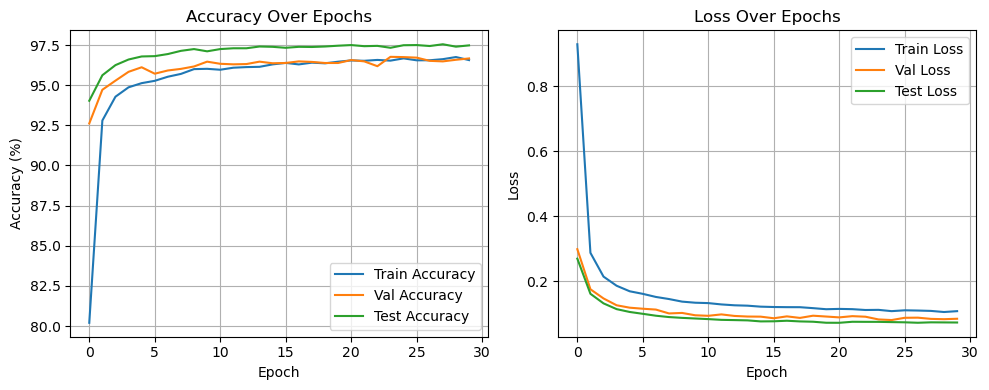

In [4]:
MNIST_123.train_classifier(autoencoder, train_loader, val_loader, test_loader, args,epochs=30)

## t-SNE Analysis of Latent Spaces

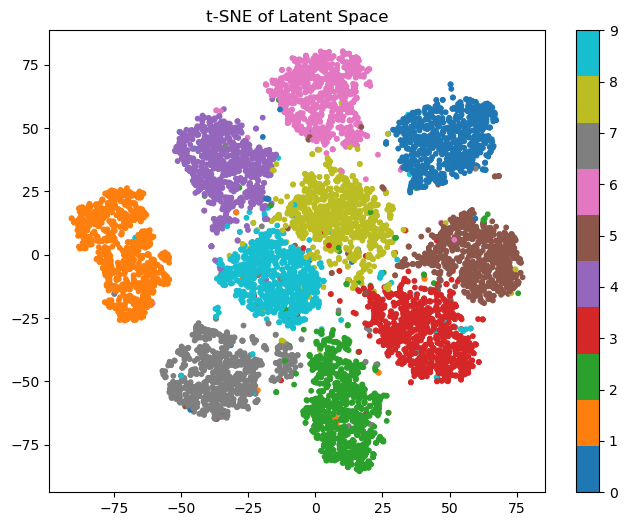

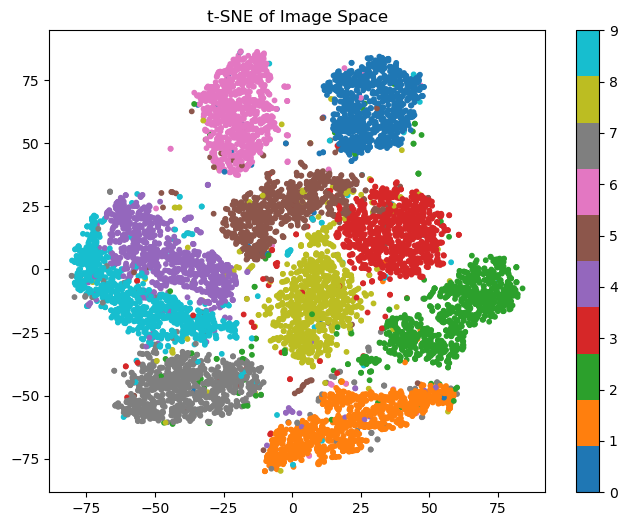

In [5]:
MNIST_123.plot_tsne(autoencoder, test_loader, args.device)